<a href="https://www.kaggle.com/code/zafarali27/college-placement-prediction?scriptVersionId=211928498" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# importing library


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("/kaggle/input/college-placement/placement-dataset.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.isnull().mean()

Unnamed: 0    0.0
cgpa          0.0
iq            0.0
placement     0.0
dtype: float64

In [7]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


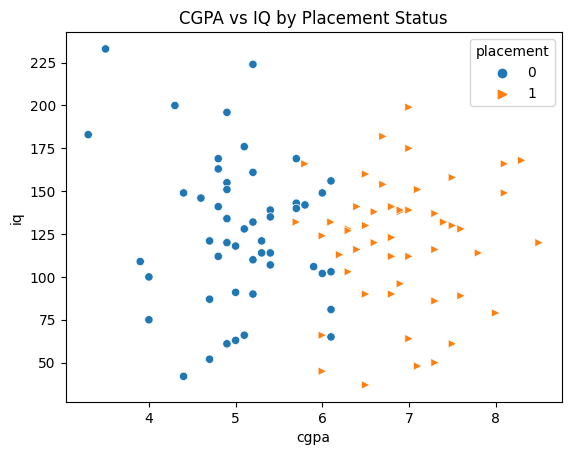

In [8]:
sns.scatterplot(x = "cgpa", y = "iq",hue = "placement",data = df,markers=["o", ">"],style="placement",)
plt.title("CGPA vs IQ by Placement Status")
plt.show()

In [9]:
x = df.drop(columns=["Unnamed: 0","placement"],axis = 1)
y = df["placement"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [11]:
pr = Perceptron(alpha=0.09)
pr.fit(x_train,y_train)

Perceptron(alpha=0.09)

In [12]:
pr.score(x_train,y_train)*100, pr.score(x_test,y_test)*100

(75.0, 70.0)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


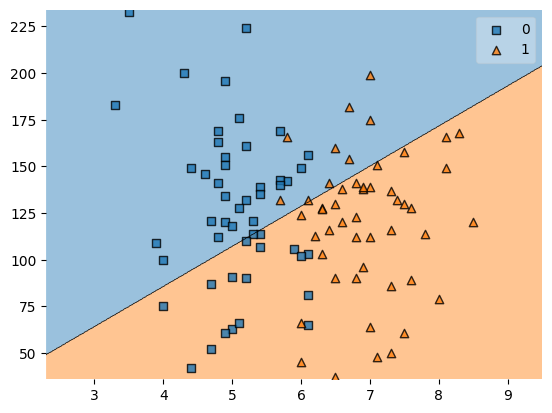

In [13]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf = pr)
plt.show()

In [14]:
X = df.drop(columns=["Unnamed: 0","placement"],axis = 1)
Y = df["placement"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [16]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [17]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_scaler, y_train)

KNeighborsClassifier()

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [19]:
y_pred = model.predict(x_test_scaler)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy *100)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 90.0
Confusion Matrix:
 [[ 8  1]
 [ 1 10]]


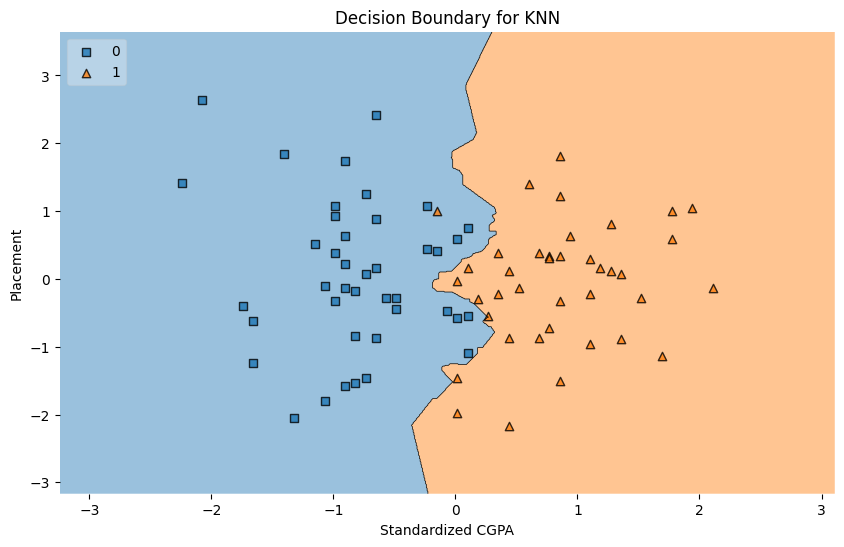

In [20]:
plt.figure(figsize=(10, 6))
plot_decision_regions(x_train_scaler,y_train.values,clf=model, legend=2)
plt.xlabel('Standardized CGPA')
plt.ylabel('Placement')
plt.title('Decision Boundary for KNN')
plt.show()

# If You like this notebook give me an upvote

# Thank you for visiting my notebook